In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# perform imports
import numpy as np
import pandas as pd

In [ ]:
# read data into DataFrame
df = pd.read_csv('/content/drive/My Drive/OptTek/spotify2010s.csv')

In [ ]:
# inspect DataFrame columns, data types, and non-null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21606 non-null  object 
 1   name              21606 non-null  object 
 2   artists           21606 non-null  object 
 3   year              21606 non-null  int64  
 4   popularity        21606 non-null  int64  
 5   key               21606 non-null  int64  
 6   tempo             21499 non-null  float64
 7   acousticness      21606 non-null  float64
 8   duration_ms       21563 non-null  float64
 9   danceability      21606 non-null  float64
 10  energy            21175 non-null  float64
 11  explicit          21606 non-null  int64  
 12  instrumentalness  21606 non-null  float64
 13  liveness          21606 non-null  float64
 14  loudness          21391 non-null  float64
 15  mode              21606 non-null  int64  
 16  speechiness       21606 non-null  float6

It is observed that there some, though not many as a percentage, observations that have null entries for certain columns.  Based on the columns in which the null entries appear and the descriptive questions to be answered, imputation of information into null entries is not necessary until Descriptive Question 4.

In [ ]:
# check columns with "object" data type to see specific data types contained
for col_name in ['id', 'name', 'artists']:
  print(col_name + ':  ' + str(df[col_name].apply(type).unique()[0]))

id:  <class 'str'>
name:  <class 'str'>
artists:  <class 'str'>


In [ ]:
# visual inspection of DataFrame schema and entry format
df.head()

,id,name,artists,year,popularity,key,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence
0,6UGYIgkzeLp4BQy30B9svV,Anhelo,"[""Adolescent's Orquesta""]",2012,58,8,91.148,0.500,248947.0,0.740,0.525,0,0.000004,0.106,-13.082,1,0.0458,0.8040
1,5SIoLK4aqXc2UzNrhVHwtp,Virgen,"[""Adolescent's Orquesta""]",2012,65,8,90.963,0.725,271727.0,0.660,0.748,0,0.000650,0.127,-4.855,1,0.0440,0.7500
2,2wCRJwiL1WSrW0Dwfco7Nj,Know Who You Are,"[""Auli'i Cravalho"", 'Vai Mahina', ""Olivia Foa'...",2016,63,11,NaN,0.941,72627.0,0.160,0.145,0,0.091900,0.103,-20.495,0,0.0359,0.0946
3,6mb6lVLNrcUgLnEN8QnDJd,How Far I'll Go,"[""Auli'i Cravalho""]",2016,74,1,83.720,0.649,163387.0,0.571,0.307,0,0.000000,0.178,-10.958,0,0.0499,0.1080
4,32pqqCrnIC5O5iE9c218PJ,How Far I'll Go - Reprise,"[""Auli'i Cravalho""]",2016,63,4,83.197,0.827,87347.0,0.427,0.449,0,0.000000,0.134,-8.370,1,0.0337,0.2310


In [ ]:
# number of unique entries in 'id' column (primary key according to assignment)
df['id'].unique().shape

(21556,)

In [ ]:
# reduce duplicate rows to one per unique row
df2 = df.drop_duplicates()
# inspect number of unique rows--matches number of unique ids
df2.shape

(21556, 18)

In [ ]:
# check for duplicated song name, artist, and year combos with entries that are not identical--see paragraph below cell
(df2['name'] + ' ' + df2['artists'] + ' ' + df2['year'].apply(str)).unique().shape

(20734,)

Even though the above cell demonstrates that there are unique entries for songs that have the same name, artists, and year, these are identified as being unique by their primary key ('id') by Spotify, and there is no basis for singling one entry out as the true entry.  Therefore, all entries are kept.

In [ ]:
# function to manipulate entries in 'artists' column to a more manageable form for later manipulation
def fix_artists_text(text):
  text = text.strip('[]').split(',')
  new_text = []
  for item in text:
    new_item = item.strip().strip('"').strip("'")
    new_text.append(new_item)
  return ','.join(new_text)

# apply function to DataFrame and visualize
df3 = df2.copy()
df3['artists_mod'] = df3['artists'].apply(fix_artists_text)
df3.head()

,id,name,artists,year,popularity,key,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence,artists_mod
0,6UGYIgkzeLp4BQy30B9svV,Anhelo,"[""Adolescent's Orquesta""]",2012,58,8,91.148,0.500,248947.0,0.740,0.525,0,0.000004,0.106,-13.082,1,0.0458,0.8040,Adolescent's Orquesta
1,5SIoLK4aqXc2UzNrhVHwtp,Virgen,"[""Adolescent's Orquesta""]",2012,65,8,90.963,0.725,271727.0,0.660,0.748,0,0.000650,0.127,-4.855,1,0.0440,0.7500,Adolescent's Orquesta
2,2wCRJwiL1WSrW0Dwfco7Nj,Know Who You Are,"[""Auli'i Cravalho"", 'Vai Mahina', ""Olivia Foa'...",2016,63,11,NaN,0.941,72627.0,0.160,0.145,0,0.091900,0.103,-20.495,0,0.0359,0.0946,"Auli'i Cravalho,Vai Mahina,Olivia Foa'i,Opetai..."
3,6mb6lVLNrcUgLnEN8QnDJd,How Far I'll Go,"[""Auli'i Cravalho""]",2016,74,1,83.720,0.649,163387.0,0.571,0.307,0,0.000000,0.178,-10.958,0,0.0499,0.1080,Auli'i Cravalho
4,32pqqCrnIC5O5iE9c218PJ,How Far I'll Go - Reprise,"[""Auli'i Cravalho""]",2016,63,4,83.197,0.827,87347.0,0.427,0.449,0,0.000000,0.134,-8.370,1,0.0337,0.2310,Auli'i Cravalho


In [ ]:
# determine maximum number of artists for an individual song
max_num_artists = 1
for i in range(df3.shape[0]):
  num_artists = len(df3.iloc[i]['artists_mod'].split(','))
  if num_artists > max_num_artists:
    max_num_artists = num_artists
print(max_num_artists)

22


In [ ]:
# allocating columns in DataFrame to hold one artist per column so that song with most number of artists can be accommodated
blank_array = np.zeros(shape=(df3.shape[0], max_num_artists))
artists_name_col_labels = ["artist_{}".format(i) for i in range(1, max_num_artists + 1)]
artists_name_df = pd.DataFrame(data=blank_array, columns=artists_name_col_labels, dtype='str')
df4 = pd.concat(objs=[df3, artists_name_df], axis=1, ignore_index=False)
df4.head()

,id,name,artists,year,popularity,key,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence,artists_mod,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,artist_12,artist_13,artist_14,artist_15,artist_16,artist_17,artist_18,artist_19,artist_20,artist_21,artist_22
0,6UGYIgkzeLp4BQy30B9svV,Anhelo,"[""Adolescent's Orquesta""]",2012,58,8,91.148,0.500,248947.0,0.740,0.525,0,0.000004,0.106,-13.082,1,0.0458,0.8040,Adolescent's Orquesta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5SIoLK4aqXc2UzNrhVHwtp,Virgen,"[""Adolescent's Orquesta""]",2012,65,8,90.963,0.725,271727.0,0.660,0.748,0,0.000650,0.127,-4.855,1,0.0440,0.7500,Adolescent's Orquesta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2wCRJwiL1WSrW0Dwfco7Nj,Know Who You Are,"[""Auli'i Cravalho"", 'Vai Mahina', ""Olivia Foa'...",2016,63,11,NaN,0.941,72627.0,0.160,0.145,0,0.091900,0.103,-20.495,0,0.0359,0.0946,"Auli'i Cravalho,Vai Mahina,Olivia Foa'i,Opetai...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6mb6lVLNrcUgLnEN8QnDJd,How Far I'll Go,"[""Auli'i Cravalho""]",2016,74,1,83.720,0.649,163387.0,0.571,0.307,0,0.000000,0.178,-10.958,0,0.0499,0.1080,Auli'i Cravalho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32pqqCrnIC5O5iE9c218PJ,How Far I'll Go - Reprise,"[""Auli'i Cravalho""]",2016,63,4,83.197,0.827,87347.0,0.427,0.449,0,0.000000,0.134,-8.370,1,0.0337,0.2310,Auli'i Cravalho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# populating artist name columns as appropriate for each song
for i in range(df4.shape[0]):
  artists = df4.iloc[i]['artists_mod'].split(',')
  num_artists = len(artists)
  artist_num = 1
  while (artist_num <= num_artists):
    df4.loc[i, 'artist_{}'.format(artist_num)] = artists[artist_num - 1]
    artist_num += 1

# Descriptive Question 1

How many observations (songs) are from the year 2020?

In [ ]:
# selecting subset where year = 2020 and returning number of rows
df4[df4['year'] == 2020].shape[0]

1656

# Descriptive Question 2

Which song in the data set had the longest duration? What do you notice about the songs with the longest durations?

In [ ]:
# sorting DataFrame by 'duration_ms' in descending order and returning top entry's name, artists, and year
df4.sort_values(by=['duration_ms'], ascending=False).head(1)[['name', 'artists', 'year']]

,name,artists,year
17781,Brown Noise - 90 Minutes,['Sound Dreamer'],2013


In [ ]:
# sorting DataFrame by 'duration_ms' in descending order and returning top 10 entries for observation
df4.sort_values(by=['duration_ms'], ascending=False).head(10)

,id,name,artists,year,popularity,key,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence,artists_mod,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,artist_12,artist_13,artist_14,artist_15,artist_16,artist_17,artist_18,artist_19,artist_20,artist_21,artist_22
17781,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,['Sound Dreamer'],2013,50,2,0.000,0.11100,5403500.0,0.0000,0.000099,0,0.392,0.1370,-21.669,1,0.0000,0.00000,Sound Dreamer,Sound Dreamer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14800,2QfFLpSGF1T1pY6tq4kD7Z,Ocean Waves Sounds,['Ocean Sounds'],2010,44,1,84.788,0.93200,4120258.0,0.0797,0.995000,0,0.562,0.3100,-17.379,1,0.0612,0.00001,Ocean Sounds,Ocean Sounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14802,1saXdvEAafdRzUphXBzSHg,Ocean Waves for Sleep,['Ocean Waves For Sleep'],2010,55,1,84.788,0.93200,4120258.0,0.0797,0.995000,0,0.562,0.3100,-17.379,1,0.0612,0.00001,Ocean Waves For Sleep,Ocean Waves For Sleep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9163,4uiYbSb9a0jbNctHif2j4w,Skyrim Atmospheres,['Jeremy Soule'],2013,52,4,75.267,0.80900,2558287.0,0.0676,0.210000,0,0.897,0.0872,-29.314,0,0.0886,0.03900,Jeremy Soule,Jeremy Soule,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14282,7qd8HUQEoRTLbV4wd1CXRD,Rain With Distant Thunderstorm,['Nature Sounds'],2012,48,8,110.004,0.00583,1943484.0,0.1580,0.574000,0,0.579,0.3470,-25.155,1,0.1790,0.02990,Nature Sounds,Nature Sounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14283,0mbGHKzGjJx1omRaqNgwmB,Rain With Light Thunderstorm,['Nature Sounds'],2012,48,8,110.004,0.00583,1943484.0,0.1580,0.574000,0,0.579,0.3470,-25.155,1,0.1790,0.02990,Nature Sounds,Nature Sounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14288,7sf5OBXs8RudV2XQLBOX5d,Relaxing Rain and Thunderstorm,['Nature Sounds'],2011,46,8,76.001,0.00580,1943459.0,0.0645,0.596000,0,0.553,0.3480,-25.146,1,0.2150,0.02930,Nature Sounds,Nature Sounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,3YMOXCsCYZTSdGMOZz8SzI,Delta Waves for Deep Healing Sleep,['Binaural Beats Brain Waves Isochronic Tones ...,2011,45,0,109.374,0.73500,1440027.0,0.1590,0.479000,0,0.980,0.2120,-28.307,0,0.0770,0.02530,Binaural Beats Brain Waves Isochronic Tones Br...,Binaural Beats Brain Waves Isochronic Tones Br...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19379,0xY2BLCZhmxgnNXldJ9FwM,White Noise Fan for Babies,['The White Noise'],2011,54,8,67.083,0.13000,1393220.0,0.0559,0.000652,0,0.650,0.1100,-29.031,1,0.0733,0.02440,The White Noise,The White Noise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16066,2kAgCRZPG3YQR2VMqRvLmb,The Lark Ascending,"['Ralph Vaughan Williams', 'Tasmin Little', 'B...",2013,63,4,74.554,0.90200,935360.0,0.0811,0.012200,0,0.308,0.0648,-32.654,0,0.0511,0.03840,"Ralph Vaughan Williams,Tasmin Little,BBC Philh...",Ralph Vaughan Williams,Tasmin Little,BBC Philharmonic,Andrew Davis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The songs with the longest durations are tracks that are background noises for relaxation/sleep.

# Descriptive Question 3

We will define a song as "popular" if its Popularity is greater than 75, and "not popular" otherwise; how many songs are defined as "popular" in each year?

In [ ]:
# selecting subset where popularity is greater than 75, grouping by year, and then returning count of songs with >75 popularity in each year
popular_song_counts = df4[df4['popularity'] > 75].groupby(['year'])['id'].count().rename('Popular Song Count')
print(popular_song_counts)

year
2010     12
2011     13
2012     19
2013     23
2014     30
2015     45
2016     58
2017    128
2018    206
2019    367
2020    279
Name: Popular Song Count, dtype: int64


# Descriptive Question 4

Which variables share a strong correlation? Interpret these correlations.

In [ ]:
# inspecting DataFrame to observe columns appropriate to include in correlation calculation and extent of non-null values
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21555
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21556 non-null  object 
 1   name              21556 non-null  object 
 2   artists           21556 non-null  object 
 3   year              21556 non-null  int64  
 4   popularity        21556 non-null  int64  
 5   key               21556 non-null  int64  
 6   tempo             21449 non-null  float64
 7   acousticness      21556 non-null  float64
 8   duration_ms       21513 non-null  float64
 9   danceability      21556 non-null  float64
 10  energy            21125 non-null  float64
 11  explicit          21556 non-null  int64  
 12  instrumentalness  21556 non-null  float64
 13  liveness          21556 non-null  float64
 14  loudness          21341 non-null  float64
 15  mode              21556 non-null  int64  
 16  speechiness       21556 non-null  float6

In [ ]:
# selecting numerical variables and imputing mean to fill null values
# imputing mean selected as means to fill nulls because the amount of nulls is relatively low
df_imputed = df4.copy()
numerical_vars_list = ['year', 'popularity', 'tempo', 'acousticness', 'duration_ms', 'danceability', 'energy', 'instrumentalness', 'liveness', \
                       'loudness', 'speechiness', 'valence']
for col in numerical_vars_list:
  df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())

In [ ]:
# inspecting DataFrame with imputed values
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21555
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21556 non-null  object 
 1   name              21556 non-null  object 
 2   artists           21556 non-null  object 
 3   year              21556 non-null  int64  
 4   popularity        21556 non-null  int64  
 5   key               21556 non-null  int64  
 6   tempo             21556 non-null  float64
 7   acousticness      21556 non-null  float64
 8   duration_ms       21556 non-null  float64
 9   danceability      21556 non-null  float64
 10  energy            21556 non-null  float64
 11  explicit          21556 non-null  int64  
 12  instrumentalness  21556 non-null  float64
 13  liveness          21556 non-null  float64
 14  loudness          21556 non-null  float64
 15  mode              21556 non-null  int64  
 16  speechiness       21556 non-null  float6

In [ ]:
# calculate correlation matrix using numerical variables
corr_matrix = df_imputed[numerical_vars_list].corr()

# create DataFrame holding correlation coefficients for each pair of numerical variables
for i, col in enumerate(corr_matrix.columns):
  if (i == 0):
    data_array = np.array([corr_matrix.index, [corr_matrix.columns[i] for j in range(len(corr_matrix.index))], corr_matrix.iloc[:, i]]).T
  else:
    new_data = np.array([corr_matrix.index, [corr_matrix.columns[i] for j in range(len(corr_matrix.index))], corr_matrix.iloc[:, i]]).T
    data_array = np.append(data_array, new_data, axis=0)
corr_df = pd.DataFrame(data=data_array)

# display strongest positive correlation coefficients
corr_df[corr_df[0] != corr_df[1]].sort_values(by=[2], ascending=False).head(10)

,0,1,2
81,loudness,energy,0.699578
114,energy,loudness,0.699578
1,popularity,year,0.496045
12,year,popularity,0.496045
71,valence,danceability,0.442021
137,danceability,valence,0.442021
141,loudness,valence,0.378303
119,valence,loudness,0.378303
138,energy,valence,0.371655
83,valence,energy,0.371655


In terms of positive correlation, loudness and energy share a relatively strong correlation.  This makes sense given that louder music is generally more energetic.  Even on a physical level, it takes more energy to produce louder sounds.

In [ ]:
# display strongest negative correlation coefficients
corr_df[corr_df[0] != corr_df[1]].sort_values(by=[2]).head(10)

,0,1,2
75,acousticness,energy,-0.668504
42,energy,acousticness,-0.668504
115,instrumentalness,loudness,-0.621173
93,loudness,instrumentalness,-0.621173
111,acousticness,loudness,-0.555206
45,loudness,acousticness,-0.555206
89,danceability,instrumentalness,-0.357063
67,instrumentalness,danceability,-0.357063
79,instrumentalness,energy,-0.309507
90,energy,instrumentalness,-0.309507


In terms of a negative correlation, acousticness and energy share a relatively strong negative correlation.  This makes sense because music that is more acoustic is going to involve reduced used of amplication.  This is reflected to a lesser degree with the slightly less strong negative correlation between loudness and acousticness.  Instrumentalness and loudness also share a relatively strong negative correlation, which makes sense because a voice is not present to add additional loudness to the track.  Also, a lot of instruments are not intended to be played loudly.

# Descriptive Question 5

Which artist(s) are most prolific? Which are most popular?



## Prolific

In [ ]:
# determine artists who appear in the 'artists' column for the most number of songs
df5 = df4.copy()[artists_name_col_labels]
prolific_artists = df5.apply(pd.Series.value_counts).fillna(0).apply(np.sum, axis=1).drop('0.0')
prolific_artists.sort_values(ascending=False).head(10)

Drake             288.0
Taylor Swift      151.0
Future            149.0
Mac Miller        140.0
Kendrick Lamar    135.0
Nicki Minaj       133.0
The Weeknd        133.0
Lil Wayne         133.0
Lil Uzi Vert      130.0
BTS               129.0
dtype: float64

## Popular

In [ ]:
# create DataFrame showing every artist, the number of songs in which they are listed in the 'artists' column, and
# the average popularity of those songs
artist_name_list = []
artist_song_count_list = []
artist_song_avg_pop_list = []
for artist in prolific_artists.index:
  artist_song_df = df3.copy()
  artist_song_df['Artist Present?'] = artist_song_df['artists_mod'].apply(lambda x:  artist in x.split(','))
  artist_song_df = artist_song_df[artist_song_df['Artist Present?'] == True]
  artist_name_list.append(artist)
  artist_song_count_list.append(artist_song_df.shape[0])
  artist_song_avg_pop_list.append(artist_song_df['popularity'].mean())

popular_artists_df = pd.DataFrame(data={'Number of Songs': artist_song_count_list, 'Average Song Popularity': artist_song_avg_pop_list},\
                                  index=artist_name_list)
popular_artists_df.sort_values(by=['Average Song Popularity'], ascending=[False]).head(10)

,Number of Songs,Average Song Popularity
Emilee,1,95.0
StaySolidRocky,1,94.0
A7S,1,92.0
Topic,1,92.0
Regard,1,90.0
Juanka,1,87.0
Brray,1,87.0
Sam Fischer,1,86.0
Dímelo Flow,2,86.0
S1mba,1,86.0


Since the artists with the greatest average song popularity have relatively few songs, the popularity is assessed at various levels based on the amount of songs in which the artist is involved.

In [ ]:
# showing artists with highest average song popularity for a minimum of 0, 10, 50, and 100 songs
for min_song_num in [0, 10, 50, 100]:
  pop_df = popular_artists_df[popular_artists_df['Number of Songs'] > min_song_num].sort_values(by=['Average Song Popularity'], ascending=[False]).head(1)
  print('For artists having greater than {} songs, the most popular artist is {} with an average popularity of {}.'.format\
        (min_song_num, pop_df.iloc[0].name, round(pop_df.iloc[0]['Average Song Popularity'], 1)))

For artists having greater than 0 songs, the most popular artist is Emilee with an average popularity of 95.0.
For artists having greater than 10 songs, the most popular artist is Dalex with an average popularity of 78.7.
For artists having greater than 50 songs, the most popular artist is Anuel AA with an average popularity of 73.1.
For artists having greater than 100 songs, the most popular artist is Travis Scott with an average popularity of 69.4.


# Predictive Question 1

In [ ]:
# dropping 'id', 'name', and 'artists' columns from DataFrame due to lack of generalizable and useful predictive information
df_model = df_imputed[df.columns].drop(columns=['id', 'name', 'artists'])
# creating labeled data for popular and unpopular songs based on popular defined as having >75 popularity
df_model['pop_label'] = df_model['popularity'].apply(lambda x: 1 if x > 75 else 0)
# inspect number of popular and unpopular songs--data is heavily imbalanced
data_balance = df_model['pop_label'].value_counts()
print('# popular:  {}\n# unpopular:  {}\n% popular:  {}'.format(data_balance.loc[1], data_balance.loc[0],\
                                                                round(100*data_balance.loc[1]/(data_balance.loc[0] + data_balance.loc[1]), 2)))

# popular:  1180
# unpopular:  20376
% popular:  5.47


In [ ]:
# drop popularity column since it has been replaced with a labeled column
df_model.drop(columns=['popularity'], inplace=True)

In [ ]:
# show that features available for selection and labels are fully populated
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21555
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              21556 non-null  int64  
 1   key               21556 non-null  int64  
 2   tempo             21556 non-null  float64
 3   acousticness      21556 non-null  float64
 4   duration_ms       21556 non-null  float64
 5   danceability      21556 non-null  float64
 6   energy            21556 non-null  float64
 7   explicit          21556 non-null  int64  
 8   instrumentalness  21556 non-null  float64
 9   liveness          21556 non-null  float64
 10  loudness          21556 non-null  float64
 11  mode              21556 non-null  int64  
 12  speechiness       21556 non-null  float64
 13  valence           21556 non-null  float64
 14  pop_label         21556 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 3.3 MB


In [ ]:
# assess value ranges of data
df_model.describe()

,year,key,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence,pop_label
count,21556.000000,21556.000000,21556.000000,21556.000000,2.155600e+04,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000,21556.000000
mean,2014.918770,5.202125,120.813463,0.255381,2.225290e+05,0.604657,0.630687,0.302004,0.068373,0.188270,-7.368929,0.647059,0.104214,0.463163,0.054741
std,3.130405,3.596039,30.576272,0.287609,8.557095e+04,0.170468,0.215588,0.459138,0.217891,0.152347,4.680773,0.477896,0.110109,0.240131,0.227480
min,2010.000000,0.000000,0.000000,0.000000,3.030100e+04,0.000000,0.000020,0.000000,0.000000,0.000000,-54.376000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.000000,96.964000,0.026000,1.873330e+05,0.502000,0.504000,0.000000,0.000000,0.097600,-8.301250,0.000000,0.037200,0.276000,0.000000
50%,2015.000000,5.000000,120.079000,0.130500,2.151225e+05,0.617000,0.652000,0.000000,0.000001,0.124000,-6.312500,1.000000,0.054800,0.452000,0.000000
75%,2018.000000,8.000000,140.337250,0.408000,2.463938e+05,0.729000,0.795000,1.000000,0.000451,0.232000,-4.818000,1.000000,0.123000,0.643000,0.000000
max,2020.000000,11.000000,220.099000,0.996000,5.403500e+06,0.986000,1.000000,1.000000,1.000000,0.990000,1.023000,1.000000,0.950000,0.990000,1.000000


In [ ]:
# assess fraction of songs considered popular by year
df_model_year =df_model[['year', 'pop_label']]
df_model_year_red = df_model_year.groupby(['year'])['pop_label'].mean()
df_model_year_red.sort_values(ascending=False)

year
2019    0.183500
2020    0.168478
2018    0.103000
2017    0.064000
2016    0.029457
2015    0.023304
2014    0.015000
2013    0.011500
2012    0.009500
2011    0.006500
2010    0.006000
Name: pop_label, dtype: float64

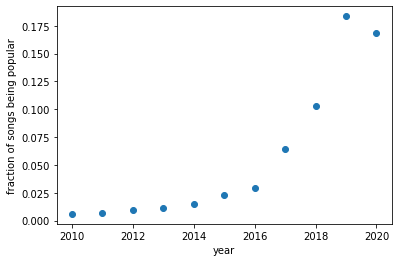

In [ ]:
# positive correlation observed between the year and fraction of songs considered popular
import matplotlib.pyplot as plt
plt.scatter(df_model_year_red.index, df_model_year_red.values)
plt.xlabel('year'), plt.ylabel('fraction of songs being popular')
plt.savefig(fname='/content/drive/My Drive/OptTek/year plot', edgecolor='black')
plt.show()

In [ ]:
# assess fraction of songs considered popular by key
df_model_key =df_model[['key', 'pop_label']]
df_model_key_red = df_model_key.groupby(['key'])['pop_label'].mean()
df_model_key_red.sort_values(ascending=False)

key
11    0.066820
10    0.065484
6     0.063625
5     0.059897
1     0.057132
8     0.055623
7     0.052823
0     0.052653
4     0.048083
9     0.046499
2     0.044337
3     0.039187
Name: pop_label, dtype: float64

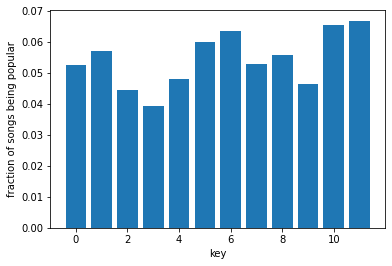

In [ ]:
# some variation in fraction of songs being popular observed across keys but not much
plt.bar(df_model_key_red.index, df_model_key_red.values)
plt.xlabel('key'), plt.ylabel('fraction of songs being popular')
plt.savefig(fname='/content/drive/My Drive/OptTek/key plot', edgecolor='black')
plt.show()

In [ ]:
# assess fraction of songs considered popular by whether it is explicit or not
df_model_explicit =df_model[['explicit', 'pop_label']]
df_model_explicit_red = df_model_explicit.groupby(['explicit'])['pop_label'].mean()
df_model_explicit_red.sort_values(ascending=False)

explicit
1    0.074040
0    0.046391
Name: pop_label, dtype: float64

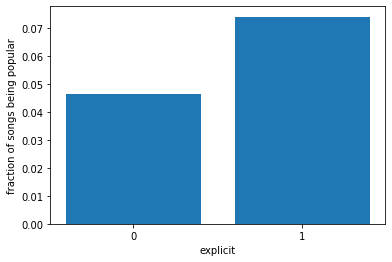

In [ ]:
# about 3% difference between fraction of songs being popular for explicit vs. non-explicit
plt.bar(df_model_explicit_red.index, df_model_explicit_red.values, tick_label=['0', '1'])
plt.xlabel('explicit'), plt.ylabel('fraction of songs being popular')
plt.savefig(fname='/content/drive/My Drive/OptTek/explicit plot', edgecolor='black')
plt.show()

In [ ]:
# assess fraction of songs considered popular by mode
df_model_mode =df_model[['mode', 'pop_label']]
df_model_mode_red = df_model_mode.groupby(['mode'])['pop_label'].mean()
df_model_mode_red.sort_values(ascending=False)

mode
0    0.065457
1    0.048896
Name: pop_label, dtype: float64

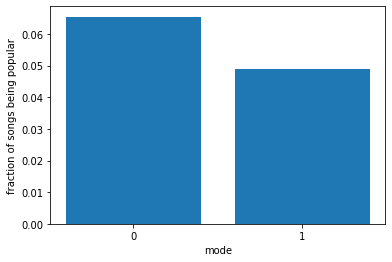

In [ ]:
# about 1.5% difference between fraction of songs being popular for explicit vs. non-explicit
plt.bar(df_model_mode_red.index, df_model_mode_red.values, tick_label=['0', '1'])
plt.xlabel('mode'), plt.ylabel('fraction of songs being popular')
plt.savefig(fname='/content/drive/My Drive/OptTek/mode plot', edgecolor='black')
plt.show()

pop_label
0    0.256145
1    0.242181
Name: acousticness, dtype: float64


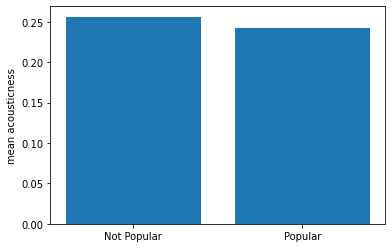

pop_label
0    223605.763258
1    203936.204336
Name: duration_ms, dtype: float64


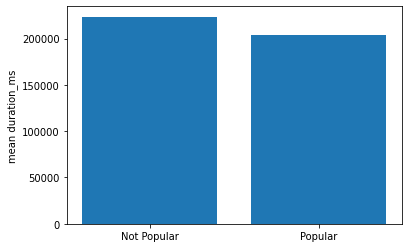

pop_label
0    0.599951
1    0.685929
Name: danceability, dtype: float64


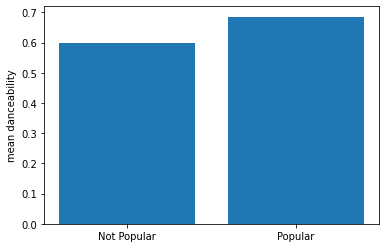

pop_label
0    0.631317
1    0.619793
Name: energy, dtype: float64


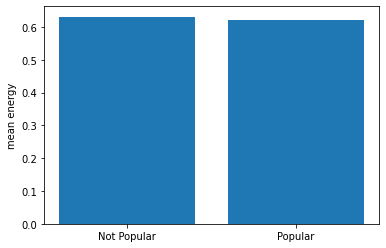

pop_label
0    0.071226
1    0.019111
Name: instrumentalness, dtype: float64


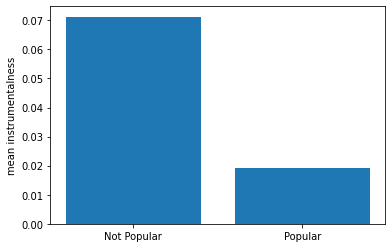

pop_label
0    0.189449
1    0.167914
Name: liveness, dtype: float64


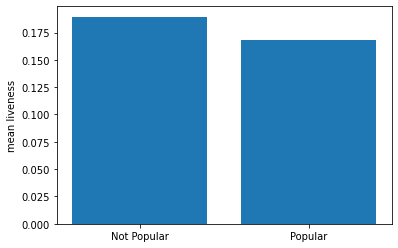

pop_label
0   -7.424938
1   -6.401777
Name: loudness, dtype: float64


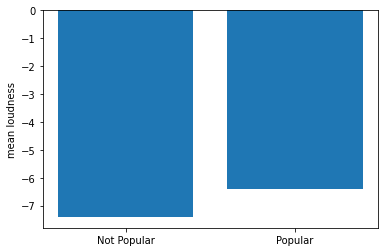

pop_label
0    0.103746
1    0.112298
Name: speechiness, dtype: float64


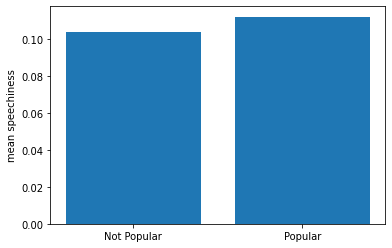

pop_label
0    0.461372
1    0.494102
Name: valence, dtype: float64


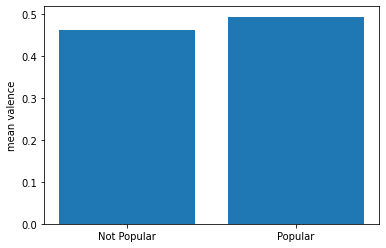

In [ ]:
for feature in ['acousticness', 'duration_ms', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']:
  # assess average feature value for popular and unpopular songs
  df_model_feature =df_model[[feature, 'pop_label']]
  df_model_feature_red = df_model_feature.groupby(['pop_label'])[feature].mean()
  print(df_model_feature_red)
  plt.bar(df_model_feature_red.index, df_model_feature_red.values, tick_label=['Not Popular', 'Popular'])
  plt.ylabel('mean {}'.format(feature))
  plt.savefig(fname='/content/drive/My Drive/OptTek/{} plot'.format(feature), edgecolor='black')
  plt.show()

In [ ]:
# key excluded from features for further consideration due to lack of clear benefit and unnecessary complication of adding extra feature to
# account for all categories
# further feature selection to be performed by random forest
df_model_2 = df_model.drop(columns=['key'])
df_model_2.head()

,year,tempo,acousticness,duration_ms,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,valence,pop_label
0,2012,91.148000,0.500,248947.0,0.740,0.525,0,0.000004,0.106,-13.082,1,0.0458,0.8040,0
1,2012,90.963000,0.725,271727.0,0.660,0.748,0,0.000650,0.127,-4.855,1,0.0440,0.7500,0
2,2016,120.813463,0.941,72627.0,0.160,0.145,0,0.091900,0.103,-20.495,0,0.0359,0.0946,0
3,2016,83.720000,0.649,163387.0,0.571,0.307,0,0.000000,0.178,-10.958,0,0.0499,0.1080,0
4,2016,83.197000,0.827,87347.0,0.427,0.449,0,0.000000,0.134,-8.370,1,0.0337,0.2310,0


In [ ]:
# split features and labels
X = df_model_2.drop(columns=['pop_label'])
Y = df_model_2['pop_label']

In [ ]:
# function to calculate sensitivity, specificity, and accuracy
def sens_spec_acc_calc(Y_true, Y_pred):
  results_ct = pd.crosstab(Y_true, Y_pred)
  try:
    num_pos_correct = results_ct.loc[1][1]
  except:
    num_pos_correct = 0
  try:
    num_neg_correct = results_ct.loc[0][0]
  except:
    num_neg_correct = 0
  
  num_pos = Y_true[Y_true == 1].shape[0]
  num_neg = Y_true[Y_true == 0].shape[0]
  total = num_pos + num_neg
  if (num_pos == 0):
    sens = np.nan
  else:
    sens = num_pos_correct/num_pos
  if (num_neg == 0):
    spec = np.nan
  else:
    spec = num_neg_correct/num_neg
  acc = (num_pos_correct + num_neg_correct)/total
  return (sens, spec, acc)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# function to run model for requested parameters and return model values and model object
def run_model(n_estimators, max_depth, undersampling, X, Y):
  num_popular = Y[Y == 1].shape[0]
  num_unpopular = Y[Y == 0].shape[0]
  if (undersampling < 0):
    num_unpopular_to_sample = num_unpopular
    undersampling = 0
    print('Used undersampling of 0.')
  elif (undersampling > 1):
    num_unpopular_to_sample = num_popular
    undersampling = 1
    print('Used undersampling of 1.')
  else:
    num_unpopular_to_sample = num_popular + int(np.floor((num_unpopular - num_popular)*(1-undersampling)))

  unpopular_indices = np.random.choice(Y[Y == 0].index, num_unpopular_to_sample, replace=False)
  popular_indices = Y[Y == 1].index.values
  indices_to_sample = np.concatenate((unpopular_indices, popular_indices), axis=0)
  X = X.loc[indices_to_sample]
  Y = Y.loc[indices_to_sample]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1).fit(X_train, Y_train)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)
  train_sens, train_spec, train_acc = sens_spec_acc_calc(Y_train, Y_train_pred)
  test_sens, test_spec, test_acc = sens_spec_acc_calc(Y_test, Y_test_pred)

  baseline_accuracy = num_unpopular_to_sample/(num_popular + num_unpopular_to_sample)

  return {'n_estimators': n_estimators, 'max_depth': max_depth, 'undersampling': undersampling, 'train_sens': train_sens, 
          'train_spec': train_spec, 'train_acc': train_acc, 'test_sens': test_sens, 
          'test_spec': test_spec, 'test_acc': test_acc, 'baseline_accuracy': baseline_accuracy, 'model': model}

In [ ]:
# apply grid search to find optimal model
n_estimators_list = []
max_depth_list = []
undersampling_list = []
train_sens_list = []
train_spec_list = []
train_acc_list = []
test_sens_list = []
test_spec_list = []
test_acc_list = []
baseline_accuracy_list = []
for n_estimators in [10, 100, 1000]:
  for undersampling in np.arange(0, 1.1, 0.1):
    for max_depth in [None, 2, 4]:
      results = run_model(n_estimators, max_depth, undersampling, X, Y)
      n_estimators_list.append(results['n_estimators'])
      max_depth_list.append(results['max_depth'])
      undersampling_list.append(results['undersampling'])
      train_sens_list.append(results['train_sens'])
      train_spec_list.append(results['train_spec'])
      train_acc_list.append(results['train_acc'])
      test_sens_list.append(results['test_sens'])
      test_spec_list.append(results['test_spec'])
      test_acc_list.append(results['test_acc'])
      baseline_accuracy_list.append(results['baseline_accuracy'])

In [ ]:
# create DataFrame from results of grid search
results_df = pd.DataFrame(data={'Number of Trees': n_estimators_list, 'Max Tree Depth': max_depth_list, 'Degree of Undersampling': undersampling_list, 
                                'Training Sensitivity': train_sens_list, 'Training Specificity': train_spec_list, 
                                'Training Accuracy': train_acc_list, 'Testing Sensitivity': test_sens_list, 
                                'Testing Specificity': test_spec_list, 'Testing Accuracy': test_acc_list, 
                                'Baseline Accuracy': baseline_accuracy_list})

# add derived quantities to DataFrame to assess models
results_df['Sens. Gen. Gap'] = results_df['Testing Sensitivity'] - results_df['Training Sensitivity']
results_df['Spec. Gen. Gap'] = results_df['Testing Specificity'] - results_df['Training Specificity']
results_df['Acc. Gen. Gap'] = results_df['Testing Accuracy'] - results_df['Training Accuracy']
results_df['Accuracy Gain v. Baseline'] = results_df['Testing Accuracy'] - results_df['Baseline Accuracy']
results_df['Mean Absolute Gen. Gap'] = (abs(results_df['Sens. Gen. Gap']) + abs(results_df['Spec. Gen. Gap']) + abs(results_df['Acc. Gen. Gap']))/3
results_df['Mean of Testing Accuracy Metrics'] = (results_df['Testing Sensitivity'] + results_df['Testing Specificity'] + results_df['Testing Accuracy'])/3

In [ ]:
# apply testing sensitivity filter
results_df2 = results_df[results_df['Testing Sensitivity'] > 0.5]
results_df2.shape

(9, 16)

In [ ]:
# apply testing specificity filter
results_df3 = results_df2[results_df2['Testing Specificity'] > 0.5]
results_df3.shape

(9, 16)

In [ ]:
# apply mean absolute generalization gap filter
results_df4 = results_df3[results_df3['Mean Absolute Gen. Gap'] < 0.05]
results_df4.shape

(6, 16)

In [ ]:
results_df4.sort_values(by=['Mean of Testing Accuracy Metrics'], ascending=False)

,Number of Trees,Max Tree Depth,Degree of Undersampling,Training Sensitivity,Training Specificity,Training Accuracy,Testing Sensitivity,Testing Specificity,Testing Accuracy,Baseline Accuracy,Sens. Gen. Gap,Spec. Gen. Gap,Acc. Gen. Gap,Accuracy Gain v. Baseline,Mean Absolute Gen. Gap,Mean of Testing Accuracy Metrics
97,1000,2.0,1.0,0.801679,0.701604,0.752119,0.801762,0.730612,0.764831,0.5,0.000083,0.029008,0.012712,0.264831,0.013934,0.765735
32,10,4.0,1.0,0.811123,0.718717,0.765360,0.788546,0.726531,0.756356,0.5,-0.022577,0.007814,-0.009004,0.256356,0.013132,0.757144
65,100,4.0,1.0,0.823715,0.730481,0.777542,0.814978,0.697959,0.754237,0.5,-0.008737,-0.032522,-0.023305,0.254237,0.021521,0.755725
98,1000,4.0,1.0,0.831060,0.726203,0.779131,0.814978,0.681633,0.745763,0.5,-0.016082,-0.044571,-0.033369,0.245763,0.031340,0.747458
64,100,2.0,1.0,0.798531,0.720856,0.760064,0.792952,0.677551,0.733051,0.5,-0.005579,-0.043305,-0.027013,0.233051,0.025299,0.734518
31,10,2.0,1.0,0.705142,0.729412,0.717161,0.665198,0.673469,0.669492,0.5,-0.039943,-0.055942,-0.047669,0.169492,0.047852,0.669386


## Details of Final Model Selected

Architecture:  Random Forest Classifier

In [ ]:
results_df4.loc[98]

Number of Trees                     1000.000000
Max Tree Depth                         4.000000
Degree of Undersampling                1.000000
Training Sensitivity                   0.831060
Training Specificity                   0.726203
Training Accuracy                      0.779131
Testing Sensitivity                    0.814978
Testing Specificity                    0.681633
Testing Accuracy                       0.745763
Baseline Accuracy                      0.500000
Sens. Gen. Gap                        -0.016082
Spec. Gen. Gap                        -0.044571
Acc. Gen. Gap                         -0.033369
Accuracy Gain v. Baseline              0.245763
Mean Absolute Gen. Gap                 0.031340
Mean of Testing Accuracy Metrics       0.747458
Name: 98, dtype: float64

In [ ]:
model_to_be_tested = run_model(1000, 4, 1, X, Y)['model']